# Introduction to Agent Based Modeling with BPTK_PY

Next to System Dynamics models BPTK_PY also suports agent based modeling and mixed agent-based/SD models.

Agent-based models are much more powerful than SD models - you can build any model you build with SD with ABM,  but not the other way round. This is because ABM are built with code (and hence are Turing complete) as opposed to SD, which is not a Turing complete language.

This power comes at a cost of course: ABMs are built using code, so you need good programming skills to create them. They also tend to be much slower than SD models.

Agent-based models are particularly useful as a basis for training AI algorithms, which is why we have extended BPTK_PY.

To illustrate agent-based modeling and how to do this with BPTK_PY, we will build an agent-based version of the simple project management model we covered in our last blog posts on BPTK_PY.

The basic concept behind agent-based models is quite simple: you populate an environment (the model) with a set of agents. Agents and the envorinment each have a set of properties and each agent must always be in a defined state. Agents can perform actions and interact amongst each other and with the environment by sending each other events - the agents react to these events by updating their properties and/or changing their state.

So to create an agent in Python, all you really need to do is:

* Define the agents properties
* Define an action method, which describes what the agent does in each time-step, e.g. perform internal tasks and send events to other agents
* Define handlers for each kind of event you want your agent to react to
* Implement an initializer which sets the agents initial state

Defining the model is even easier:

* Define the environment properties
* Tell the model which kinds of agents there are

Then, to configure the simulation, all we need to do is to set the initial values of the properties and instantiate the initial agents. Much like with the SD models, this is done using a config file defined in JSON.

Let's make this concrete for our SPM model, I'll illustrated the key elements in the diagram below:

* We have two kinds of agents, staffMember and task.
* Staff members can either be available or busy working on a task. Staff members have two properties: their current productivity and the progress they have made on the task they are currently working on.
* Tasks are either, open, in progress, or closed. Tasks have an "effort" property defining the initial effort per task and a "remaining effort" property which tracks how much more effort needs to be invested into a task in order to complete it.
* Staff Members send the "taskStarted" event to a task when they start working on a task and a "taskProgress" event every time they do some work on the task.
* The environment provides the overall productivity property and the deadline.
* A staff member only works on one task at a time.

In [1]:
%%javascript
/*this sets the title of the browser tab - useful if you have multiple JupyterLab sessions*/
document.title='BPTK PY Tutorial - JupyterLab'

<IPython.core.display.Javascript object>

In [2]:
## BPTK Package
from BPTK_Py.bptk import bptk 

bptk = bptk()

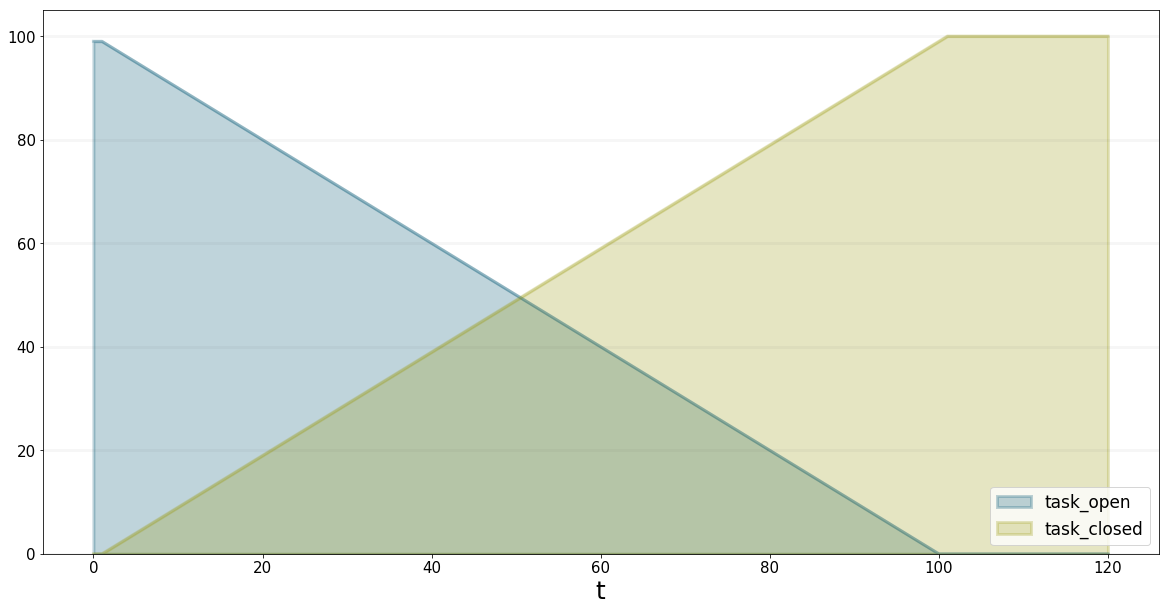

In [3]:
bptk.plot_scenarios(
    scenario_managers=["ABMsmSimpleProjectManagement"],
    kind="area",
    scenarios=["scenarioSPM"],
    agents=["task"],
    agent_states=["open","closed"],
)


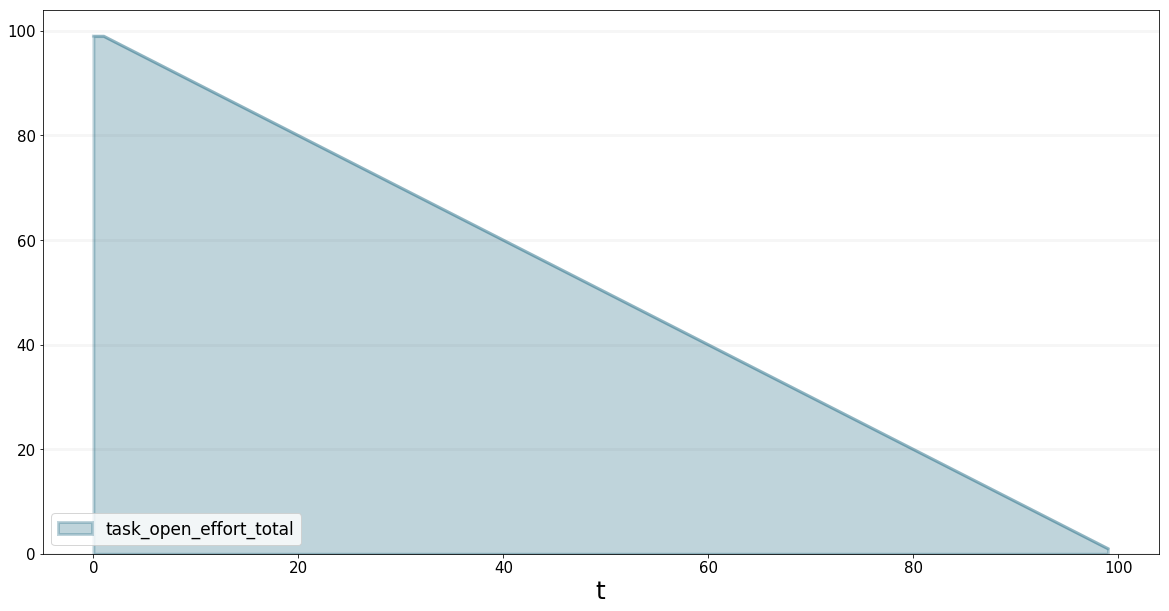

In [4]:
bptk.plot_scenarios(
    scenario_managers=["ABMsmSimpleProjectManagement"],
    kind="area",
    scenarios=["scenarioSPM"],
    agents=["task"],
    agent_states=["open"],
    agent_properties=["effort"],
    agent_property_types=["total"]
)

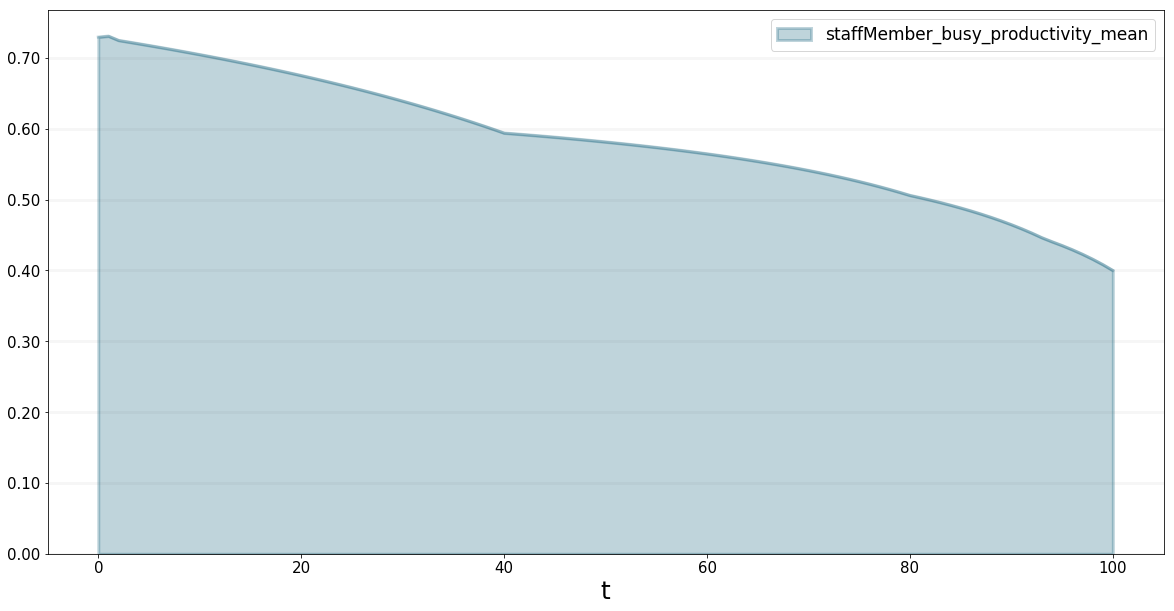

In [5]:
bptk.plot_scenarios(
    scenario_managers=["ABMsmSimpleProjectManagement"],
    kind="area",
    scenarios=["scenarioSPM"],
    agents=["staffMember"],
    agent_states=["busy"],
    agent_properties=["productivity"],
    agent_property_types=["mean"]
)

### Widgets for ABM simulation
Agent based simulations can take a very long time. Visualizations with widgets can visualize the progress of the simulation by monitoring agent states.

As of now, the framework comes with a widget to show states of the agents. In order to use progress widgets, you need to implement the method ``build_widget()`` in your Agent based model implementation. 
The following is an example that tracks the states of all task agents. You need to map which states to monitor and create a widgetLoader. The widgetLoader loads the specified class and you need to hand over all arguments for the widget:

```python
def build_widget(self):
    widgetLoader = WidgetLoader()
    states = {1: Task.STATES["IN_PROGRESS"], 2: Task.STATES["CLOSED"]}
    agents = [agent for agent in self.agents if isinstance(agent, Task)]
        
    widgetLoader.create_widget("AgentStatusWidget", states=states, agents=agents)
        
    return widgetLoader
```

In [9]:
df =bptk.run_abm_with_widget(scenario_manager="ABMsmSimpleProjectManagement",scenario="scenarioSPM",agents=["task"],
    agent_states=["open","closed"])